In [ ]:
# install dependencies: 
!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# install detectron2:
!pip install detectron2==0.1.3 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html

In [ ]:
!nvidia-smi

Wed May 12 06:47:31 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8    31W / 149W |      3MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip /content/gdrive/MyDrive/dal_publaynet.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/PMC5276858_00014.jpg  
  inflating: train/PMC4377480_00001.jpg  
  inflating: train/PMC4189985_00001.jpg  
  inflating: train/PMC3745965_00001.jpg  
  inflating: train/PMC3582095_00002.jpg  
  inflating: train/PMC3087892_00001.jpg  
  inflating: train/PMC3235901_00003.jpg  
  inflating: train/PMC3376773_00003.jpg  
  inflating: train/PMC2952911_00003.jpg  
  inflating: train/PMC3649443_00003.jpg  
  inflating: train/PMC3981058_00003.jpg  
  inflating: train/PMC3504410_00001.jpg  
  inflating: train/PMC3316988_00007.jpg  
  inflating: train/PMC3791796_00001.jpg  
  inflating: train/PMC3791796_00003.jpg  
  inflating: train/PMC3876589_00004.jpg  
  inflating: train/PMC4662971_00004.jpg  
  inflating: train/PMC5002484_00004.jpg  
  inflating: train/PMC3512323_00004.jpg  
  inflating: train/PMC3423936_00003.jpg  
  inflating: train/PMC3922004_00002.jpg  
  inflating: train/PMC2946592_00001.jpg  
  inflating: train/PMC584

In [ ]:
!cp /content/train.json /content/train
!cp /content/test.json /content/test
!cp /content/val.json /content/val

In [ ]:
#You may need to restart your runtime prior to this, to let your installation take effect
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

In [ ]:
import json
from detectron2.structures import BoxMode
def get_board_dicts(imgdir,js_file):
    json_file = imgdir+"/" + js_file #Fetch the json file
    with open(json_file) as f:
        dataset_dicts = json.load(f)
        # print(dataset_dicts)
    for i in dataset_dicts:
        filename = i["file_name"] 
        i["file_name"] = imgdir+"/"+filename
        i["image_id"] = i["id"] 
        for j in i["annotations"]:
            j["bbox_mode"] = BoxMode.XYWH_ABS #Setting the required Box Mode
            j["category_id"] = int(j["category_id"]) - 1
    return dataset_dicts
# get_board_dicts("/content/train","train.json")
from detectron2.data import DatasetCatalog, MetadataCatalog
#Registering the Dataset
for d in ["train","val"]:
    DatasetCatalog.register("pubdal6_" + d, lambda d=d: get_board_dicts("/content/"+d,d + ".json"))
    MetadataCatalog.get("pubdal6_" + d).set(thing_classes=["Text","Title","List","Table","Figure"])

board_metadata = MetadataCatalog.get("pub2_train")

Metadata(name='pubdal6_train', thing_classes=['Text', 'Title', 'List', 'Table', 'Figure'])
{'file_name': '/content/train/PMC4779834_00001.jpg', 'width': 601, 'id': 378873, 'height': 800, 'annotations': [{'segmentation': [[50.58, 455.21, 290.69, 455.21, 290.69, 466.57, 290.69, 466.57, 290.69, 477.94, 290.69, 477.94, 290.69, 489.31, 290.7, 489.31, 290.7, 500.68, 290.72, 500.68, 290.72, 514.12, 290.67, 514.12, 290.67, 525.48, 290.67, 525.48, 290.67, 534.78, 290.69, 534.78, 290.69, 548.22, 290.69, 548.22, 290.69, 556.78, 290.7, 556.78, 290.7, 571.25, 290.65, 571.25, 290.65, 580.85, 290.69, 580.85, 290.69, 594.29, 290.68, 594.29, 290.68, 605.95, 290.68, 605.95, 290.68, 617.62, 290.67, 617.62, 290.67, 629.28, 290.67, 629.28, 290.67, 638.68, 290.7, 638.68, 290.7, 652.12, 290.68, 652.12, 290.68, 663.49, 290.67, 663.49, 290.67, 672.78, 290.7, 672.78, 290.7, 686.22, 290.69, 686.22, 290.69, 695.52, 290.71, 695.52, 290.71, 708.96, 290.68, 708.96, 290.68, 718.25, 290.68, 718.25, 290.68, 731.69, 290

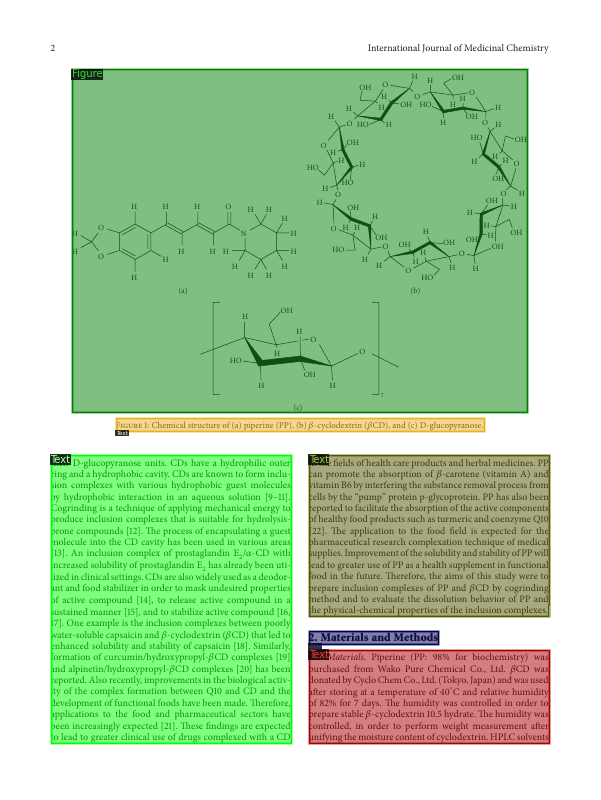

{'file_name': '/content/train/PMC4745436_00003.jpg', 'width': 601, 'id': 375951, 'height': 792, 'annotations': [{'segmentation': [[50.58, 70.14, 290.7, 70.14, 290.7, 83.58, 290.69, 83.58, 290.69, 93.87, 290.7, 93.87, 290.7, 107.31, 290.7, 107.31, 290.7, 117.61, 290.7, 117.61, 290.7, 131.05, 290.65, 131.05, 290.65, 141.34, 290.7, 141.34, 290.7, 154.78, 290.63, 154.78, 290.63, 165.06, 290.69, 165.06, 290.69, 176.93, 290.69, 176.93, 290.69, 188.8, 290.71, 188.8, 290.71, 202.23, 290.67, 202.23, 290.67, 212.53, 290.68, 212.53, 290.68, 225.97, 290.68, 225.97, 290.68, 237.83, 290.67, 237.83, 290.67, 248.12, 290.7, 248.12, 290.7, 259.99, 290.71, 259.99, 290.71, 273.43, 223.77, 273.43, 223.77, 285.3, 50.58, 285.3, 50.58, 271.86, 50.58, 271.86, 50.58, 259.99, 50.58, 248.12, 50.58, 236.26, 50.58, 224.39, 50.58, 224.39, 50.58, 212.53, 50.58, 200.67, 50.58, 188.8, 50.58, 176.93, 50.58, 165.06, 50.58, 153.2, 50.58, 141.34, 50.58, 129.47, 50.58, 117.61, 50.58, 117.61, 50.58, 105.74, 50.58, 93.87, 50.

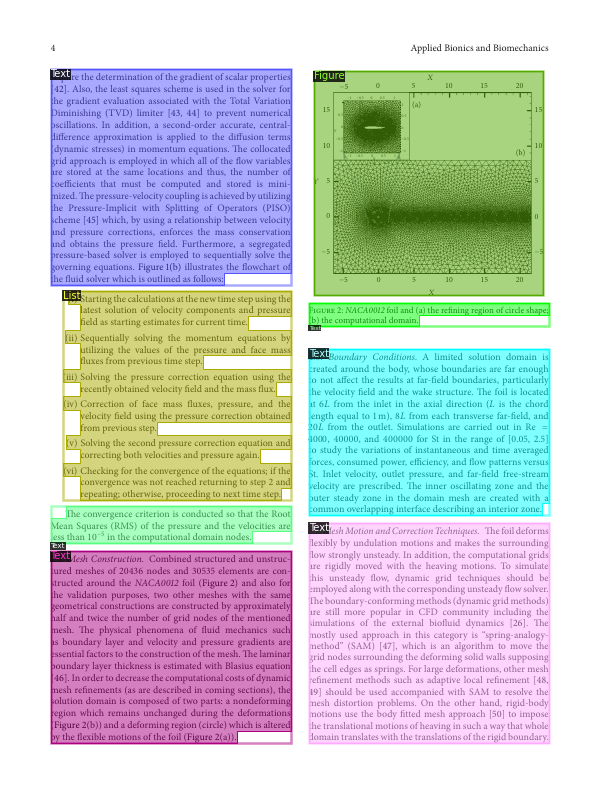

{'file_name': '/content/train/PMC2780387_00004.jpg', 'width': 612, 'id': 362129, 'height': 792, 'annotations': [{'segmentation': [[55.14, 331.41, 296.1, 331.41, 296.1, 343.18, 296.11, 343.18, 296.11, 354.3, 296.11, 354.3, 296.11, 366.7, 296.12, 366.7, 296.12, 377.82, 283.19, 377.82, 283.19, 389.59, 55.14, 389.59, 55.14, 378.46, 55.14, 366.7, 55.14, 354.94, 55.14, 343.18, 55.14, 331.41]], 'area': 13865.359230503207, 'iscrowd': 0, 'image_id': 362129, 'bbox': [55.14, 331.41, 240.98, 58.17], 'category_id': 0, 'id': 3523346, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'segmentation': [[313.08, 319.66, 554.04, 319.66, 554.04, 330.79, 554.04, 330.79, 554.04, 343.18, 554.04, 343.18, 554.04, 354.94, 554.04, 354.94, 554.04, 366.7, 554.05, 366.7, 554.05, 377.83, 554.04, 377.83, 554.04, 389.59, 554.03, 389.59, 554.03, 401.92, 554.06, 401.92, 554.06, 413.05, 554.05, 413.05, 554.05, 424.81, 554.03, 424.81, 554.03, 437.2, 554.05, 437.2, 554.05, 448.33, 554.03, 448.33, 554.03, 460.66, 554.05, 460.66, 554.05

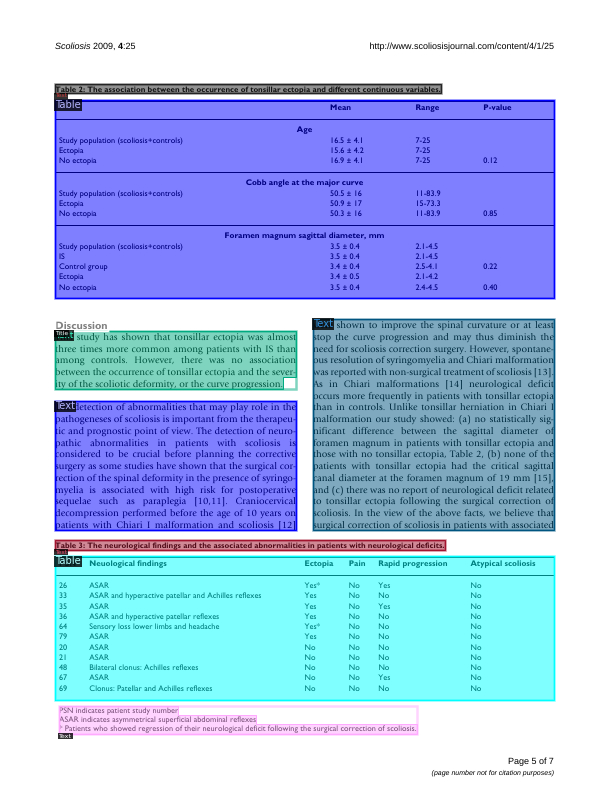

{'file_name': '/content/train/PMC1540420_00004.jpg', 'width': 612, 'id': 410423, 'height': 792, 'annotations': [{'segmentation': [[55.14, 96.39, 296.13, 96.39, 296.13, 107.52, 296.08, 107.52, 296.08, 119.92, 296.1, 119.92, 296.1, 131.04, 296.05, 131.04, 296.05, 143.44, 296.1, 143.44, 296.1, 155.2, 296.11, 155.2, 296.11, 166.9, 296.12, 166.9, 296.12, 178.03, 296.11, 178.03, 296.11, 189.79, 230.06, 189.79, 230.06, 201.55, 55.14, 201.55, 55.14, 190.42, 55.14, 178.66, 55.14, 166.9, 55.14, 155.2, 55.14, 143.44, 55.14, 131.68, 55.14, 119.92, 55.14, 108.16, 55.14, 96.39]], 'area': 24560.695816466177, 'iscrowd': 0, 'image_id': 410423, 'bbox': [55.14, 96.39, 240.99, 105.15], 'category_id': 0, 'id': 4009116, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'segmentation': [[55.14, 225.69, 296.1, 225.69, 296.1, 237.39, 296.13, 237.39, 296.13, 248.52, 296.1, 248.52, 296.1, 260.28, 296.05, 260.28, 296.05, 272.68, 296.12, 272.68, 296.12, 284.44, 296.12, 284.44, 296.12, 295.57, 296.11, 295.57, 296.11, 307.33, 1

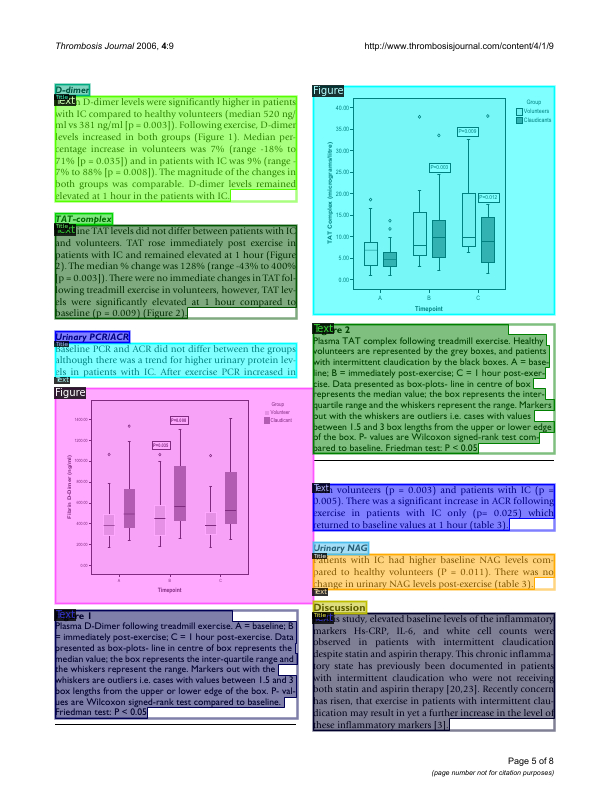

{'file_name': '/content/train/PMC4228272_00002.jpg', 'width': 596, 'id': 367488, 'height': 794, 'annotations': [{'segmentation': [[56.69, 292.52, 290.56, 292.52, 290.56, 304.54, 290.59, 304.54, 290.59, 315.46, 290.53, 315.46, 290.53, 327.42, 229.44, 327.42, 229.44, 339.44, 56.69, 339.44, 56.69, 327.42, 56.69, 327.42, 56.69, 316.11, 56.69, 304.54, 56.69, 292.52]], 'area': 10237.415442473313, 'iscrowd': 0, 'image_id': 367488, 'bbox': [56.69, 292.52, 233.89, 46.92], 'category_id': 0, 'id': 3575881, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'segmentation': [[56.69, 364.52, 290.51, 364.52, 290.51, 376.54, 290.51, 376.54, 290.51, 388.5, 290.55, 388.5, 290.55, 399.42, 290.52, 399.42, 290.52, 412.54, 290.53, 412.54, 290.53, 423.45, 290.51, 423.45, 290.51, 436.52, 290.52, 436.52, 290.52, 448.2, 290.52, 448.2, 290.52, 460.5, 290.56, 460.5, 290.56, 471.41, 290.53, 471.41, 290.53, 484.53, 290.55, 484.53, 290.55, 496.5, 290.56, 496.5, 290.56, 508.2, 290.6, 508.2, 290.6, 519.43, 290.59, 519.43, 290.59, 

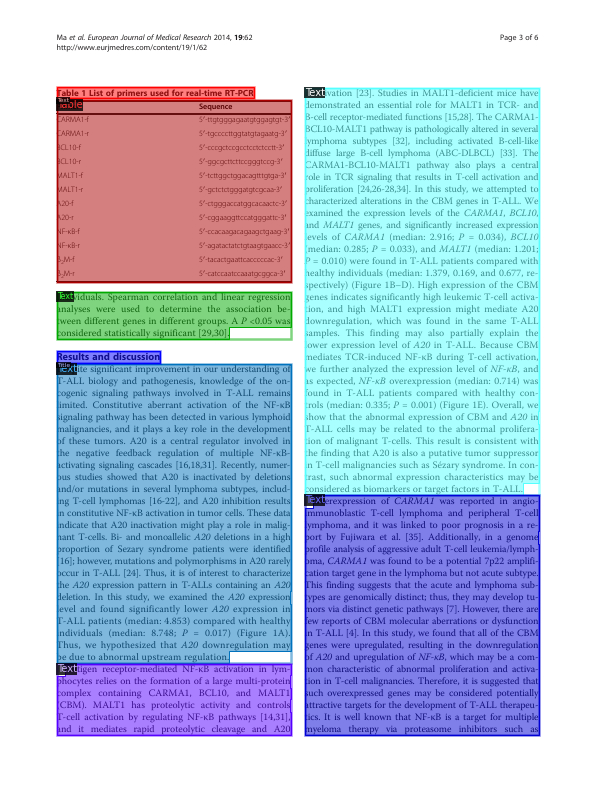

{'file_name': '/content/train/PMC6009888_00014.jpg', 'width': 612, 'id': 396018, 'height': 792, 'annotations': [{'segmentation': [[42.01, 324.76, 299.97, 324.76, 299.97, 335.7, 299.99, 335.7, 299.99, 345.83, 299.99, 345.83, 299.99, 356.82, 299.97, 356.82, 299.97, 367.77, 99.82, 367.77, 99.82, 378.71, 42.01, 378.71, 42.01, 368.58, 42.01, 357.64, 42.01, 346.7, 42.01, 335.7, 42.01, 324.76]], 'area': 11726.432516333356, 'iscrowd': 0, 'image_id': 396018, 'bbox': [42.01, 324.76, 257.98, 53.95], 'category_id': 0, 'id': 3862768, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'segmentation': [[42.01, 412.37, 299.96, 412.37, 299.96, 422.79, 299.97, 422.79, 299.97, 434.35, 299.99, 434.35, 299.99, 444.48, 299.96, 444.48, 299.96, 456.26, 300.0, 456.26, 300.0, 466.42, 299.97, 466.42, 299.97, 478.15, 300.0, 478.15, 300.0, 488.3, 297.08, 488.3, 297.08, 498.82, 299.99, 498.82, 299.99, 511.09, 299.98, 511.09, 299.98, 521.18, 91.97, 521.18, 91.97, 532.18, 42.01, 532.18, 42.01, 521.18, 42.01, 521.18, 42.01, 511.09

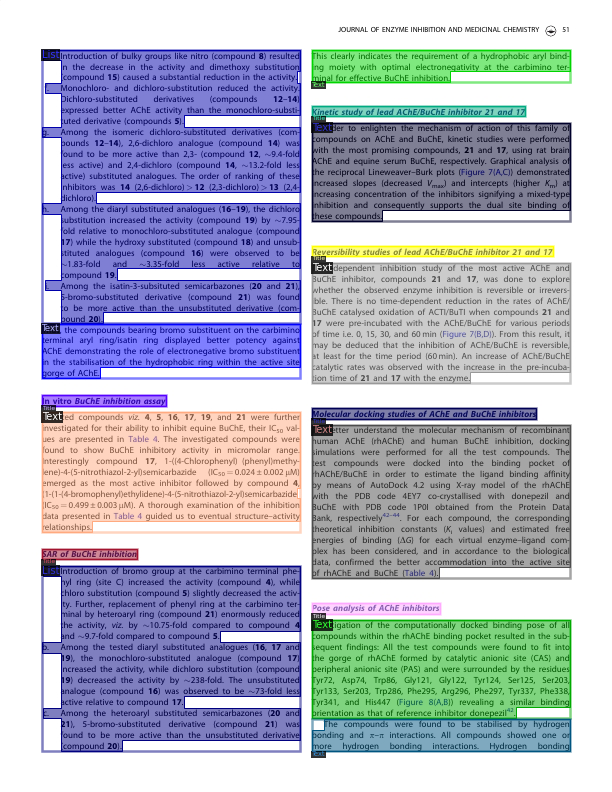

{'file_name': '/content/train/PMC5217355_00006.jpg', 'width': 596, 'id': 383467, 'height': 842, 'annotations': [{'segmentation': [[76.53, 88.55, 518.74, 88.55, 518.74, 100.77, 518.74, 100.77, 518.74, 114.28, 518.74, 114.28, 518.74, 127.79, 489.99, 127.79, 489.99, 141.3, 76.53, 141.3, 76.53, 129.08, 76.53, 115.57, 76.53, 102.06, 76.53, 88.55]], 'area': 22934.957418432372, 'iscrowd': 0, 'image_id': 383467, 'bbox': [76.53, 88.55, 442.21, 52.74], 'category_id': 0, 'id': 3740755, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'segmentation': [[97.8, 142.59, 518.74, 142.59, 518.74, 156.1, 519.99, 156.1, 519.99, 168.31, 144.27, 168.31, 144.27, 181.82, 76.53, 181.82, 76.53, 169.61, 76.53, 156.1, 97.8, 156.1, 97.8, 142.59]], 'area': 12018.050687462412, 'iscrowd': 0, 'image_id': 383467, 'bbox': [76.53, 142.59, 443.45, 39.23], 'category_id': 0, 'id': 3740756, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'segmentation': [[97.8, 622.83, 518.74, 622.83, 518.74, 636.34, 518.74, 636.34, 518.74, 648.56, 518.74, 648.56

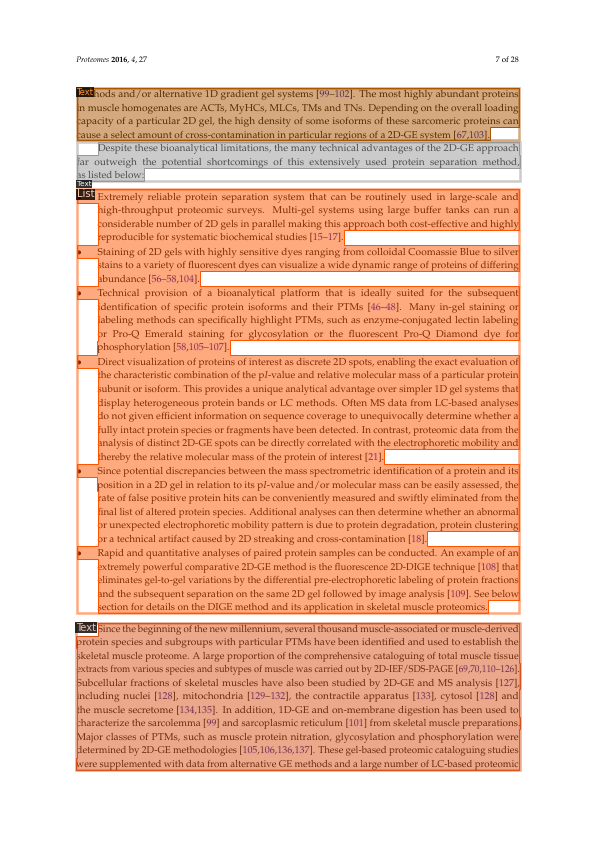

{'file_name': '/content/train/PMC4147350_00002.jpg', 'width': 601, 'id': 343637, 'height': 792, 'annotations': [{'segmentation': [[50.58, 221.9, 290.7, 221.9, 290.7, 235.34, 290.68, 235.34, 290.68, 244.63, 290.69, 244.63, 290.69, 256.0, 290.71, 256.0, 290.71, 269.44, 290.68, 269.44, 290.68, 280.81, 219.56, 280.81, 219.56, 292.17, 50.58, 292.17, 50.58, 278.73, 50.58, 267.37, 50.58, 256.0, 50.58, 244.63, 50.58, 233.26, 50.58, 221.9]], 'area': 16065.83403639181, 'iscrowd': 0, 'image_id': 343637, 'bbox': [50.58, 221.9, 240.13, 70.28], 'category_id': 0, 'id': 3344939, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'segmentation': [[65.52, 290.1, 290.7, 290.1, 290.7, 301.48, 290.75, 301.48, 290.75, 314.92, 290.67, 314.92, 290.67, 324.21, 290.68, 324.21, 290.68, 335.58, 290.72, 335.58, 290.72, 349.02, 290.66, 349.02, 290.66, 360.39, 290.64, 360.39, 290.64, 369.68, 290.65, 369.68, 290.65, 381.05, 290.7, 381.05, 290.7, 394.49, 240.03, 394.49, 240.03, 405.86, 50.58, 405.86, 50.58, 392.42, 50.58, 381.05, 

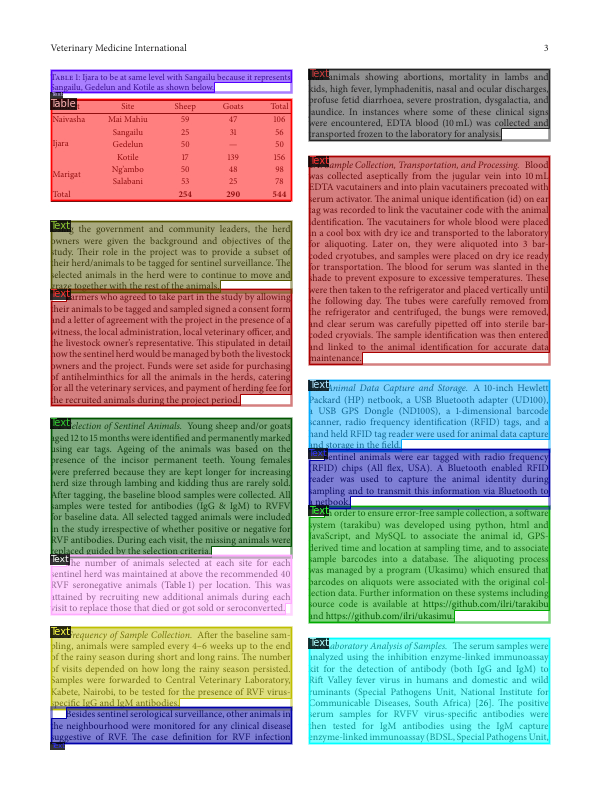

{'file_name': '/content/train/PMC4334018_00001.jpg', 'width': 601, 'id': 398705, 'height': 792, 'annotations': [{'segmentation': [[50.58, 70.14, 290.68, 70.14, 290.68, 83.58, 181.66, 83.58, 181.66, 94.95, 50.58, 94.95, 50.58, 81.51, 50.58, 70.14]], 'area': 4716.880627722712, 'iscrowd': 0, 'image_id': 398705, 'bbox': [50.58, 70.14, 240.1, 24.81], 'category_id': 0, 'id': 3889169, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'segmentation': [[65.52, 94.37, 290.68, 94.37, 290.68, 107.81, 290.64, 107.81, 290.64, 117.1, 290.67, 117.1, 290.67, 128.48, 290.7, 128.48, 290.7, 141.92, 290.67, 141.92, 290.67, 153.29, 290.65, 153.29, 290.65, 162.58, 290.71, 162.58, 290.71, 176.02, 290.67, 176.02, 290.67, 185.32, 290.71, 185.32, 290.71, 198.75, 290.7, 198.75, 290.7, 208.05, 290.71, 208.05, 290.71, 219.42, 290.76, 219.42, 290.76, 232.86, 290.69, 232.86, 290.69, 244.22, 290.68, 244.22, 290.68, 255.59, 290.68, 255.59, 290.68, 264.89, 290.69, 264.89, 290.69, 278.33, 271.92, 278.33, 271.92, 289.69, 50.58, 289.6

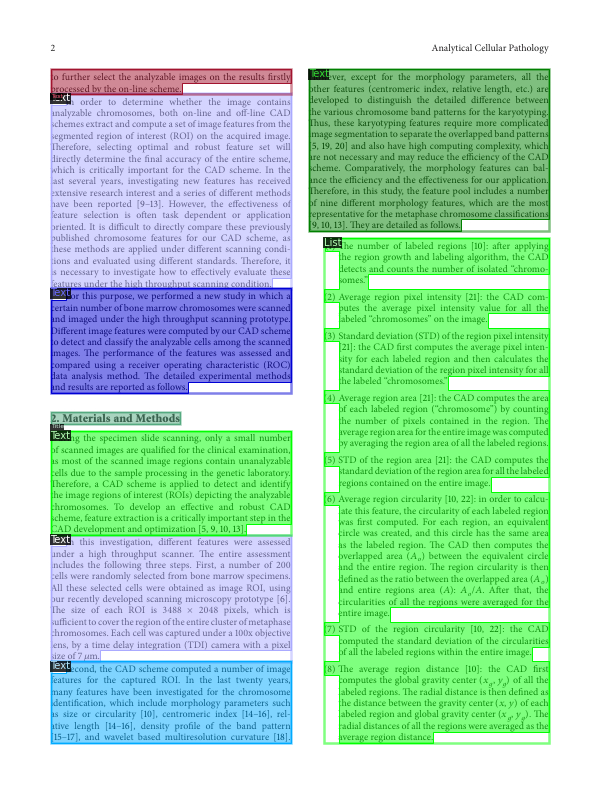

{'file_name': '/content/train/PMC5317050_00004.jpg', 'width': 596, 'id': 398955, 'height': 791, 'annotations': [{'segmentation': [[56.69, 398.94, 290.5, 398.94, 290.5, 409.85, 177.66, 409.85, 177.66, 421.87, 56.69, 421.87, 56.69, 410.95, 56.69, 398.94]], 'area': 4005.888735116838, 'iscrowd': 0, 'image_id': 398955, 'bbox': [56.69, 398.94, 233.81, 22.93], 'category_id': 0, 'id': 3891475, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'segmentation': [[64.69, 422.92, 290.52, 422.92, 290.52, 433.83, 290.49, 433.83, 290.49, 446.95, 290.52, 446.95, 290.52, 457.86, 290.48, 457.86, 290.48, 470.67, 290.53, 470.67, 290.53, 482.94, 290.53, 482.94, 290.53, 493.86, 290.51, 493.86, 290.51, 506.92, 290.55, 506.92, 290.55, 517.84, 290.44, 517.84, 290.44, 529.85, 268.11, 529.85, 268.11, 541.82, 56.69, 541.82, 56.69, 530.9, 56.69, 518.94, 56.69, 506.92, 56.69, 494.91, 56.69, 482.94, 56.69, 470.67, 56.69, 458.91, 56.69, 446.95, 56.69, 434.93, 64.69, 434.93, 64.69, 422.92]], 'area': 27436.708486448042, 'iscrowd': 

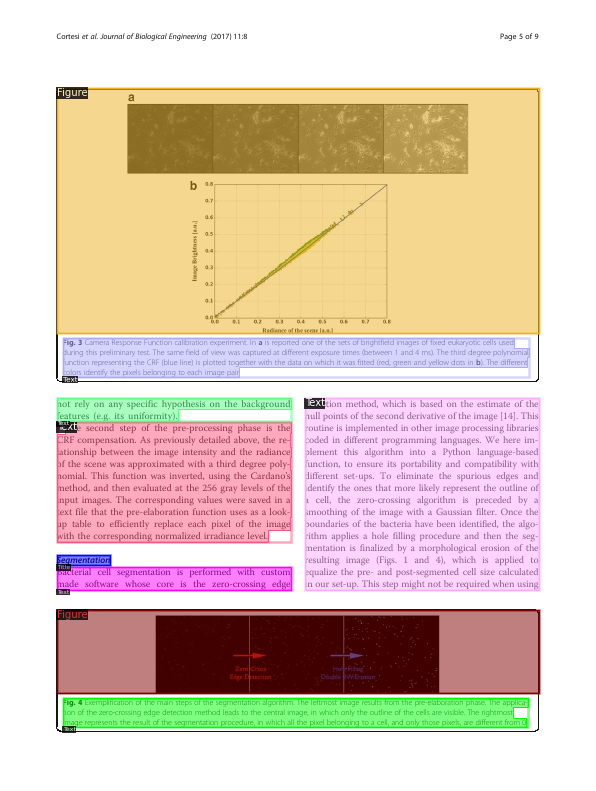

In [ ]:
# #Visualizing the Train Dataset
# print(board_metadata)
board_metadata = MetadataCatalog.get("pubdal6_train")
print(board_metadata)
dataset_dicts = get_board_dicts("/content/train","train.json")
# # print(dataset_dicts)
# #Randomly choosing 3 images from the Set
for d in random.sample(dataset_dicts, 10):
    print(d)
    for i in d['annotations']:
      print(i['category_id'])
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=board_metadata)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [ ]:
text = 0
title = 0
_lis = 0
table = 0
figure = 0
for data in dataset_dicts:
  for i in data['annotations']:
    if i['category_id'] == 0:
      text += 1
    elif i['category_id'] == 1:
      title += 1
    elif i['category_id'] == 2:
      _lis += 1
    elif i['category_id'] == 3:
      table += 1
    else:
      figure += 1

In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os
from detectron2.evaluation import COCOEvaluator

class CocoTrainer(DefaultTrainer):

  @classmethod
  def build_evaluator(cls, cfg, dataset_name, output_folder=None):

    if output_folder is None:
        os.makedirs("coco_eval", exist_ok=True)
        output_folder = "coco_eval"

    return COCOEvaluator(dataset_name, cfg, False, output_folder)

In [ ]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")) #Get the basic model configuration from the model zoo 
#Passing the Train and Validation sets
cfg.DATASETS.TRAIN = ("pubdal6_train",)
cfg.DATASETS.TEST = ("pubdal6_val",)
# Number of data loading threads
cfg.DATALOADER.NUM_WORKERS = 4
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
# Number of images per batch across all machines.
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.0125  # pick a good LearningRate
cfg.SOLVER.MAX_ITER = 1500  #No. of iterations   
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128  # 32
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 5
cfg.TEST.EVAL_PERIOD = 500 # No. of iterations after which the Validation Set is evaluated. 
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
# trainer = CocoTrainer(cfg) 
# trainer.resume_or_load(resume=False)
# trainer.train()

In [ ]:
!cp /content/output -r /content/gdrive/MyDrive/Model-dla 

##Inference

{'instances': Instances(num_instances=14, image_height=780, image_width=596, fields=[pred_boxes: Boxes(tensor([[ 44.0053, 521.0272, 166.3466, 530.9159],
        [301.0836, 106.1782, 444.2023, 116.3845],
        [302.1477, 371.6484, 441.2648, 380.7749],
        [ 45.5145, 252.4774, 289.4717, 334.4153],
        [ 44.3786,  59.6789, 295.6935, 251.3140],
        [ 46.5828, 531.1725, 293.8444, 622.4089],
        [303.4311, 115.4950, 554.4474, 356.1175],
        [ 45.7542, 624.9491, 293.3640, 713.1626],
        [ 53.8685, 350.2133, 295.7487, 467.7739],
        [305.7199, 613.2480, 551.1516, 710.9792],
        [304.5407, 382.9522, 550.3827, 588.5716],
        [295.3496, 601.4694, 506.1395, 611.4353],
        [304.6956,  60.2966, 546.6171,  93.1890],
        [ 42.4782, 483.0519, 295.8934, 505.3984]], device='cuda:0')), scores: tensor([0.9987, 0.9973, 0.9972, 0.9969, 0.9968, 0.9968, 0.9967, 0.9967, 0.9962,
        0.9960, 0.9951, 0.9940, 0.9905, 0.9581], device='cuda:0'), pred_classes: tensor([

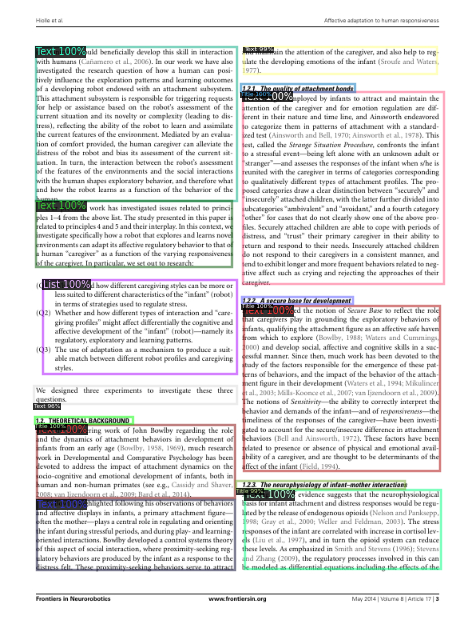

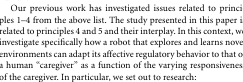

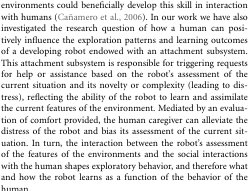

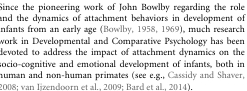

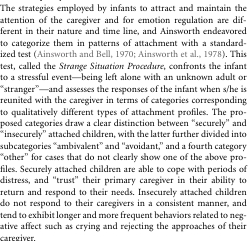

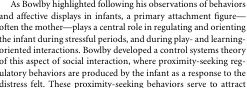

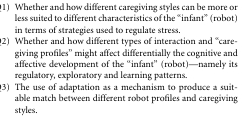

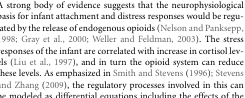

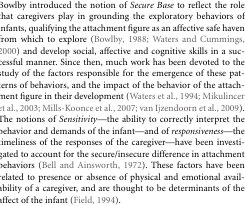

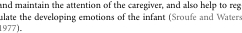

{'instances': Instances(num_instances=13, image_height=780, image_width=596, fields=[pred_boxes: Boxes(tensor([[306.2647, 484.6763, 546.7373, 567.1922],
        [304.8425, 390.1299, 548.4081, 486.0281],
        [304.6946, 584.4550, 397.4641, 597.8209],
        [302.3347, 366.6269, 497.9596, 395.0701],
        [305.1122, 605.4727, 552.7814, 651.5500],
        [309.3860, 317.8011, 541.2274, 349.0296],
        [ 51.2165, 661.4258, 279.5757, 700.2346],
        [ 47.9067, 389.0273, 295.4836, 656.2587],
        [ 50.2226, 331.1086, 284.9152, 370.3759],
        [299.6161,  61.0349, 556.4883, 315.2448],
        [305.1349, 379.5101, 367.9194, 394.3548],
        [ 50.7243,  66.6968, 340.6856, 320.3346],
        [297.9843, 366.4486, 494.1159, 380.9631]], device='cuda:0')), scores: tensor([0.9989, 0.9965, 0.9951, 0.9932, 0.9910, 0.9894, 0.9854, 0.9530, 0.9462,
        0.9340, 0.9281, 0.8877, 0.8615], device='cuda:0'), pred_classes: tensor([0, 0, 1, 1, 0, 0, 0, 4, 0, 4, 1, 4, 1], device='cuda:0'), 

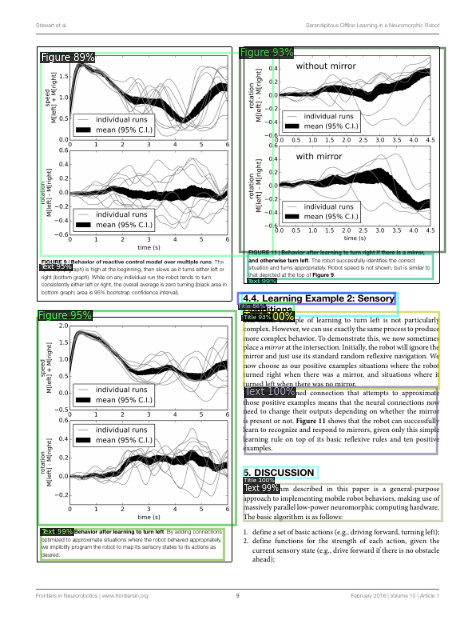

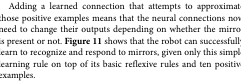

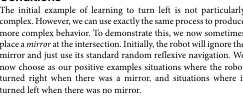

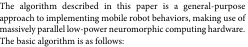

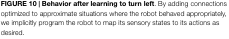

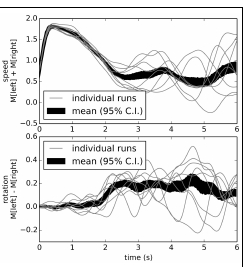

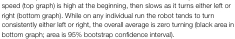

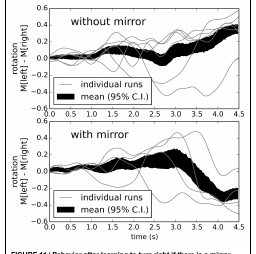

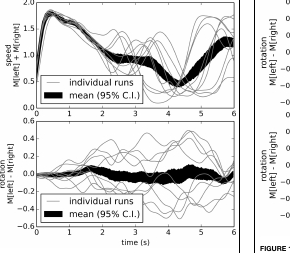

{'instances': Instances(num_instances=9, image_height=794, image_width=610, fields=[pred_boxes: Boxes(tensor([[315.3992, 270.5772, 554.5499, 448.2751],
        [314.1764, 448.4867, 548.3152, 582.0082],
        [ 56.0832, 335.1239, 294.9072, 720.9637],
        [ 58.3465, 329.6782, 219.0221, 339.3575],
        [ 59.1627,  92.4600, 301.1433, 302.5352],
        [315.6855, 257.9063, 451.7472, 267.3621],
        [315.7633, 582.2537, 551.7308, 726.2705],
        [316.2022,  65.0307, 549.9734, 233.7684],
        [ 59.5893,  68.0395, 294.3206,  91.5965]], device='cuda:0')), scores: tensor([0.9979, 0.9967, 0.9958, 0.9957, 0.9953, 0.9951, 0.9951, 0.9929, 0.9610],
       device='cuda:0'), pred_classes: tensor([0, 0, 0, 1, 0, 1, 0, 0, 0], device='cuda:0'), pred_masks: tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False,

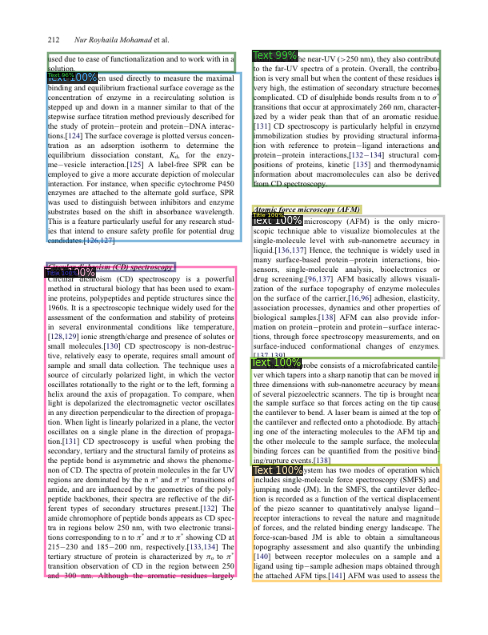

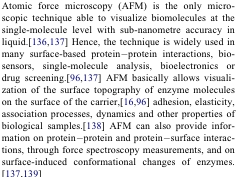

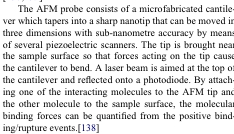

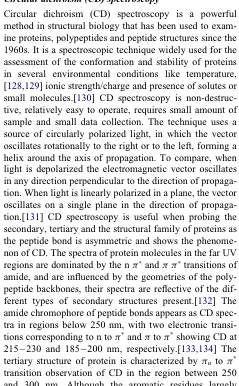

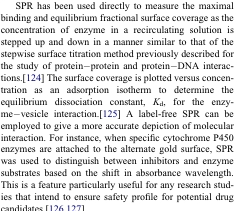

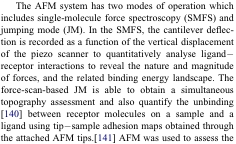

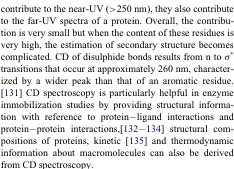

{'instances': Instances(num_instances=7, image_height=801, image_width=601, fields=[pred_boxes: Boxes(tensor([[309.2150, 609.8577, 547.2426, 673.1323],
        [ 50.4964, 151.7432, 289.4666, 207.6165],
        [ 80.7954, 241.9216, 293.5013, 781.5391],
        [308.7818, 687.4131, 548.1749, 748.1766],
        [332.8940,  71.2897, 563.4819, 546.0110],
        [ 52.3388,  71.2554, 292.7966, 128.4791],
        [308.7377, 548.9993, 548.9971, 596.0077]], device='cuda:0')), scores: tensor([0.9949, 0.9916, 0.9906, 0.9899, 0.9897, 0.9879, 0.9864],
       device='cuda:0'), pred_classes: tensor([0, 0, 2, 0, 2, 0, 0], device='cuda:0'), pred_masks: tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, Fal

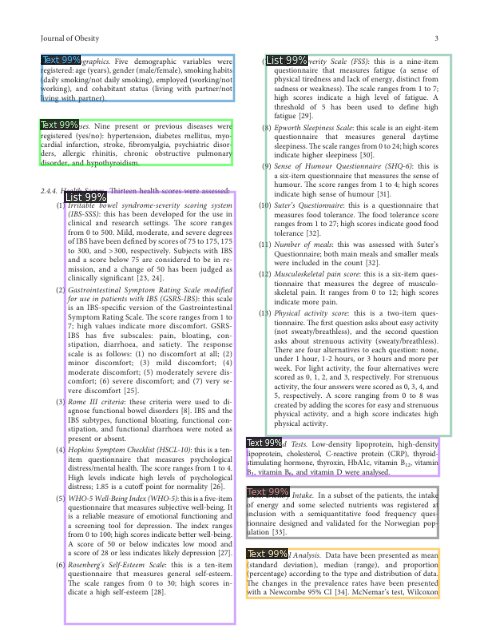

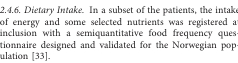

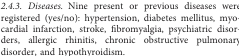

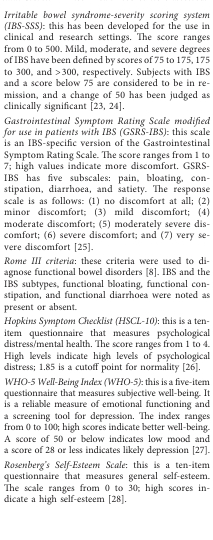

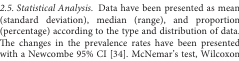

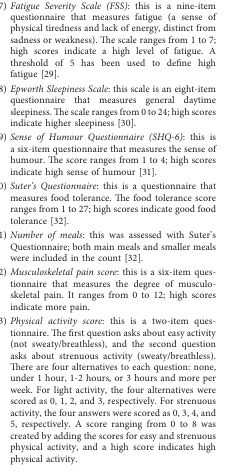

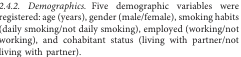

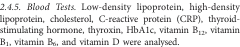

{'instances': Instances(num_instances=13, image_height=794, image_width=596, fields=[pred_boxes: Boxes(tensor([[300.2815, 309.8706, 538.1053, 403.1874],
        [303.4427, 152.4474, 543.0117, 214.1932],
        [302.8215, 215.2733, 542.8669, 309.6790],
        [ 42.1659,  58.7209, 276.7498,  79.7525],
        [301.5703,  58.9262, 542.4829, 150.4487],
        [304.5739, 653.8920, 547.7081, 731.0184],
        [ 45.6375, 519.0866, 282.9248, 580.3884],
        [ 43.8563, 454.7779, 282.2984, 519.5892],
        [301.9543, 403.5003, 537.9589, 612.3138],
        [ 42.3528, 582.4240, 285.8890, 727.8208],
        [298.8725, 632.1454, 447.0664, 643.4919],
        [ 41.5690, 421.4126, 244.0230, 439.9196],
        [ 44.4012,  93.3957, 285.9656, 413.8544]], device='cuda:0')), scores: tensor([0.9980, 0.9976, 0.9974, 0.9973, 0.9963, 0.9962, 0.9961, 0.9957, 0.9953,
        0.9949, 0.9936, 0.9924, 0.9576], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 3], device='cuda:0'), 

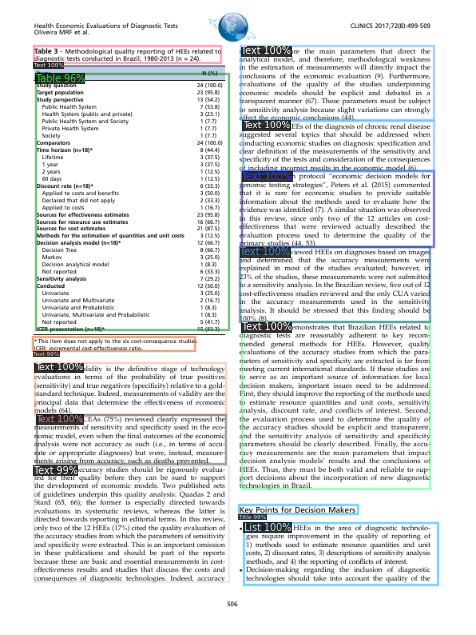

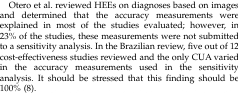

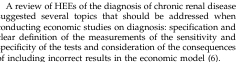

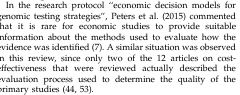

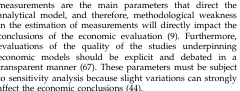

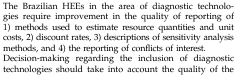

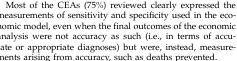

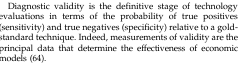

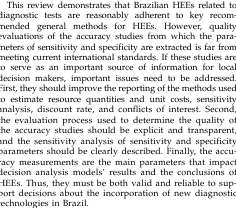

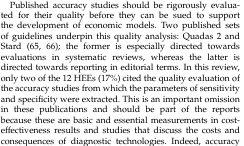

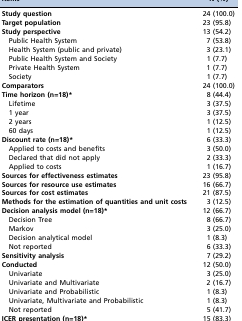

In [ ]:
import matplotlib.pyplot as plt
from detectron2.utils.visualizer import ColorMode

#Use the final weights generated after successful training for inference  
cfg.MODEL.WEIGHTS = "/content/gdrive/MyDrive/Model-dla/output/model_final.pth"

cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.8  # set the testing threshold for this model
#Pass the validation dataset
cfg.DATASETS.TEST = ("pubdal6_val", )

predictor = DefaultPredictor(cfg)

dataset_dicts = get_board_dicts("/content/val","val.json")
for d in random.sample(dataset_dicts, 5):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    print(outputs)
    v = Visualizer(im[:, :, ::-1],
                   metadata=board_metadata, 
                   scale=0.8,
                   instance_mode=ColorMode.IMAGE   
    )
    outputs['instances'].remove('pred_masks')
    v = v.draw_instance_predictions(outputs["instances"].to("cpu")) #Passing the predictions to CPU from the GPU
    cv2_imshow(v.get_image()[:, :, ::-1])
    # crop image
    bboxes = outputs['instances'].get('pred_boxes')
    for bbox in bboxes:
      bbox = bbox.to("cpu")
      # print(bbox)
      #x1, y1, x2, y2 = bbox
      x1 = round(bbox.numpy()[0])
      y1 = round(bbox.numpy()[1])
      x2 = round(bbox.numpy()[2])
      y2 = round(bbox.numpy()[3])
      cv2_imshow(im[y1:y2, x1:x2])
      

Evaluation

In [ ]:
#import the COCO Evaluator to use the COCO Metrics
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
#for d in ["test"]:
#    DatasetCatalog.register("pubdal6_" + d, lambda d=d: get_board_dicts("/content/"+d,d + ".json"))
#    MetadataCatalog.get("pubdal6_" + d).set(thing_classes=["Text","Title","List","Table","Figure"])

#Call the COCO Evaluator function and pass the Validation Dataset
evaluator = COCOEvaluator("pubdal6_val", cfg, False, output_dir="/output/")
val_loader = build_detection_test_loader(cfg, "pubdal6_val")

#Use the created predicted model in the previous step
inference_on_dataset(predictor.model, val_loader, evaluator)

[05/11 05:35:44 d2.data.common]: Serializing 1125 elements to byte tensors and concatenating them all ...
[05/11 05:35:44 d2.data.common]: Serialized dataset takes 6.33 MiB
[05/11 05:35:44 d2.evaluation.evaluator]: Start inference on 1125 images
[05/11 05:35:46 d2.evaluation.evaluator]: Inference done 11/1125. 0.1126 s / img. ETA=0:02:21
[05/11 05:35:51 d2.evaluation.evaluator]: Inference done 49/1125. 0.1141 s / img. ETA=0:02:23
[05/11 05:35:56 d2.evaluation.evaluator]: Inference done 88/1125. 0.1143 s / img. ETA=0:02:16
[05/11 05:36:01 d2.evaluation.evaluator]: Inference done 126/1125. 0.1151 s / img. ETA=0:02:12
[05/11 05:36:06 d2.evaluation.evaluator]: Inference done 164/1125. 0.1153 s / img. ETA=0:02:07
[05/11 05:36:11 d2.evaluation.evaluator]: Inference done 202/1125. 0.1153 s / img. ETA=0:02:02
[05/11 05:36:16 d2.evaluation.evaluator]: Inference done 240/1125. 0.1151 s / img. ETA=0:01:57
[05/11 05:36:21 d2.evaluation.evaluator]: Inference done 278/1125. 0.1149 s / img. ETA=0:01:

OrderedDict([('bbox',
              {'AP': 70.57289606680632,
               'AP-Figure': 74.02271271503315,
               'AP-List': 55.93891334963944,
               'AP-Table': 80.38149876038811,
               'AP-Text': 82.63059945885716,
               'AP-Title': 59.89075605011372,
               'AP50': 89.47817529620447,
               'AP75': 83.71765856425509,
               'APl': 74.89519117371344,
               'APm': 34.89975222006023,
               'APs': 21.50881405455487}),
             ('segm',
              {'AP': 72.52387830108819,
               'AP-Figure': 76.9801053269614,
               'AP-List': 56.505248250963106,
               'AP-Table': 83.80574097462355,
               'AP-Text': 84.17580072128587,
               'AP-Title': 61.15249623160701,
               'AP50': 89.54000415233662,
               'AP75': 83.41277931178762,
               'APl': 78.86779997458453,
               'APm': 33.79322547634702,
               'APs': 21.787893801268797})]